In [1]:
import math
import matplotlib.pyplot as plt
import time 
import scipy.optimize
import numpy as np

In [2]:
%matplotlib inline

## Zadanie 1

In [3]:
f = lambda x: math.e**(-2*x) + x**2 -1
f_prim = lambda x: -2*math.e**(-2*x) + 2*x
f_bis = lambda x: 4*math.e**(-2*x) + 2

In [4]:
x_range = np.linspace(-1,3,25)

In [5]:
f_values = [f(x) for x in x_range]
f_prim_values = [f_prim(x) for x in x_range]
f_bis_values = [f_bis(x) for x in x_range]

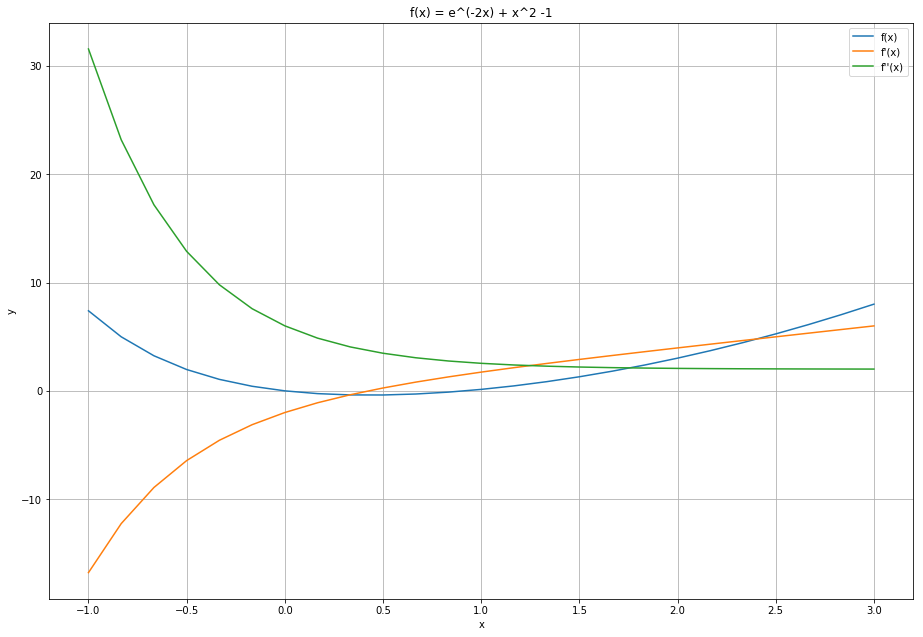

In [6]:
fig = plt.figure()
axes = fig.add_axes([0,0,2,2], title="f(x) = e^(-2x) + x^2 -1",xlabel="x",ylabel='y')
axes.grid(True)
axes.plot(x_range, f_values, label="f(x)")
axes.plot(x_range, f_prim_values, label="f'(x)")
axes.plot(x_range, f_bis_values, label="f''(x)")
axes.legend()


#### Szacunkowe wartości pierwiastków: 0, 0.9

#### Ustalamy przedziały w których będziemy szukać pierwiastków: 
1. $<-0.2,0.25>$ - ze względu na stały znak pochodnej
2. $<0.7,1.2>$

Dla metody siecznych za punkt $x_1$ przyjmujemy $-0.2$ i $1.2$ ponieważ znak funkcji jest taki sam jak znak drugiej pochodnej a za $x_0$ drugi koniec odpowiedniego przedziału.
<br> Podobnie dla metody stycznych za punkt startowy przyjmujemy $-0.2$ i $1.2$ ponieważ znak funkcji jest taki sam jak znak drugiej pochodnej.

## Zadanie 2

In [7]:
def bisection(function, a: float, b: float, epsilon: float, max_number_of_iterations: int):
    number_of_iterations = 0
    if((b-a) < epsilon) | (function(a) * function(b) >= 0):
        print("Zły dobór przedziału")
        return
    while(number_of_iterations < max_number_of_iterations):
        number_of_iterations += 1
        z = (a+b)/2
        if (abs(f(z)) < epsilon):
            return z, number_of_iterations
        elif(f(z)*f(a) > 0):
            a = z
        else:
            b = z
        if(b-a < epsilon):
            return (a+b)/2, number_of_iterations
    return (a+b)/2, number_of_iterations
            
        

#### Warunki wystarczające zbieżności meotdy:
1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a, b]$
2. Na końcach przedziału $[a, b]$ wartości funkcji $f(x)$ przyjmują przeciwne znaki, czyli zachodzi $f(a) \cdot f(b) < 0$.

In [8]:
time_ = time.time()
for x in range(100000):
    bisection(f, -0.2, 0.25, 10**-10, 100)
print("Czas: {}".format(time.time()-time_))
x0, numb_of_iter = bisection(f, -0.2, 0.25, 10**-10, 100)
print("Przybliżona wartość pierwiastka wynosi {} \n"
      "Ilość wykonanych iteracji: {}".format(x0, numb_of_iter))

Czas: 4.550827264785767
Przybliżona wartość pierwiastka wynosi 2.328305819748127e-11 
Ilość wykonanych iteracji: 31


In [9]:
time_ = time.time()
for x in range(100000):
    scipy.optimize.bisect(f, -0.20, 0.25, xtol=10**-10, full_output=True)
print("Czas: {}".format(time.time()-time_))
print(scipy.optimize.bisect(f, -0.20, 0.25, xtol=10**-10, full_output=True))

Czas: 1.6806883811950684
(-2.9103836624639397e-11,       converged: True
           flag: 'converged'
 function_calls: 35
     iterations: 33
           root: -2.9103836624639397e-11)


In [10]:
time_ = time.time()
for x in range(100000):
    bisection(f, 0.7, 1.2, 10**-10, 100)
print("Czas: {}".format(time.time()-time_))
x0, numb_of_iter = bisection(f, 0.7, 1.2, 10**-10, 100)
print("Przybliżona wartość pierwiastka wynosi {} \n"
      "Ilość wykonanych iteracji: {}".format(x0, numb_of_iter))

Czas: 4.154856443405151
Przybliżona wartość pierwiastka wynosi 0.9165625831112265 
Ilość wykonanych iteracji: 29


In [11]:
time_ = time.time()
for x in range(100000):
    scipy.optimize.bisect(f, 0.7, 1.2, xtol=10**-10, full_output=True)
print("Czas: {}".format(time.time()-time_))
print(scipy.optimize.bisect(f, 0.7, 1.2, xtol=10**-10, full_output=True))

Czas: 1.6376233100891113
(0.9165625830530189,       converged: True
           flag: 'converged'
 function_calls: 35
     iterations: 33
           root: 0.9165625830530189)


## Zadanie 3

In [12]:
def newton_raphson(function, function_prim, x0: float, epsilon: float, max_number_of_iterations):
    number_of_iterations = 0 

    while(number_of_iterations < max_number_of_iterations):
        number_of_iterations += 1
        xk = x0 - (function(x0) / function_prim(x0))
        if(abs(function(xk)) < epsilon):
            return xk, number_of_iterations
        x0 = xk

    return xk, number_of_iterations

    

 

#### Warunkiem wystarczającym zbieżności metody dla ustalonego punktu startowego i przedziału domkniętego $[a, b]$ jest:
1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a, b]$
2. Pierwsza i druga pochodna funkcji $f(x)$ istnieją i są ciągłe w przedziale domkniętym $[a, b]$
3. Na końcach przedziału $[a, b]$ wartości funkcji $f(x)$ przyjmują przeciwne znaki, czyli zachodzi $f(a)\cdot f(b) < 0$
4. Pierwsza i druga pochodna mają stały znak w całym przedziale $[a, b]$ co oznacza że w przedziale nie ma ekstremów lokalnych i punktów przegięcia
5. Punkt startowy obliczeń to ten koniec przedziału $[a, b]$, w którym funkcja $f(x)$ przyjmuje ten sam znak co jej druga pochodna, czyli zachodzi $f(x_0)f''(x_0) > 0$, gdzie $x_0 = a \vee x_0 = b$

In [13]:
time_ = time.time()
for x in range(100000):
    newton_raphson(f, f_prim, -0.2, 10**-10, 100)
print("Czas: {}".format(time.time()-time_))
x0, numb_of_iter = newton_raphson(f, f_prim, -0.2, 10**-10, 100)
print("Przybliżona wartość pierwiastka wynosi {} \n"
      "Ilość wykonanych iteracji: {}".format(x0, numb_of_iter))

Czas: 0.64829421043396
Przybliżona wartość pierwiastka wynosi 1.513707656052328e-17 
Ilość wykonanych iteracji: 5


In [32]:
time_ = time.time()
for x in range(100000):
    scipy.optimize.newton(f, -0.2, fprime=f_prim, tol=10**-10)
print("Czas: {}".format(time.time()-time_))
for x in range (1,100):
    try:
        print("Przybliżona wartość pierwiastka wynosi {}\n"
        "Wykonane iteracje: {}".format(scipy.optimize.newton(f, -0.2, fprime=f_prim, tol=10**-10, maxiter=x),x))
        break
    except RuntimeError:
        continue
        

Czas: 0.727055549621582
Przybliżona wartość pierwiastka wynosi 1.513707656052328e-17
Wykonane iteracje: 6


In [16]:
time_ = time.time()
for x in range(100000):
    newton_raphson(f, f_prim, 0.7, 10**-10, 100)
print("Czas: {}".format(time.time()-time_))
x0, numb_of_iter = newton_raphson(f, f_prim, 0.7, 10**-10, 100)
print("Przybliżona wartość pierwiastka wynosi {} \n"
      "Ilość wykonanych iteracji: {}".format(x0, numb_of_iter))

Czas: 0.6432538032531738
Przybliżona wartość pierwiastka wynosi 0.9165625831056982 
Ilość wykonanych iteracji: 5


In [31]:
time_ = time.time()
for x in range(100000):
    scipy.optimize.newton(f, 0.7, fprime=f_prim, tol=10**-10)
print("Czas: {}".format(time.time()-time_))
for x in range (1,100):
    try:
        print("Przybliżona wartość pierwiastka wynosi {}\n"
        "Wykonane iteracje: {}".format(scipy.optimize.newton(f, 0.7, fprime=f_prim, tol=10**-10, maxiter=x),x))
        break
    except RuntimeError:
        continue
        

Czas: 0.7130923271179199
Przybliżona wartość pierwiastka wynosi 0.9165625831056982
Wykonane iteracje: 6


## Zadanie 4

In [18]:
def secant(function, x0: float, x1: float, epsilon: float, max_number_of_iterations: int):
    number_of_iterations = 0 

    while(number_of_iterations < max_number_of_iterations):
        number_of_iterations += 1
        xk = x1 - (function(x1) / (function(x0) - function(x1)) * (x0 - x1)) 
        if(abs(function(xk)) < epsilon):
            return xk, number_of_iterations
        
        x0 = x1
        x1 = xk
        
    return xk, number_of_iterations

#### Warunkiem wystarczającym zbieżności metody dla ustalonych punktów startowych i przedziału domkniętego $[a, b]$ jest:
1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a, b]$
2. Pierwsza i druga pochodna funkcji $f(x)$ istnieją i są ciągłe w przedziale domkniętym $[a, b]$
3. Na końcach przedziału $[a, b]$ wartości funkcji $f(x)$ przyjmują przeciwne znaki, czyli zachodzi $f(a)\cdot f(b) < 0$
4. Pierwsza i druga pochodna mają stały znak w całym przedziale $[a, b]$ co oznacza że w przedziale nie ma ekstremów lokalnych i punktów przegięcia


In [38]:
time_ = time.time()
for x in range(100000):
    secant(f, 0.25, -0.2, 10**-10, 100)
print("Czas: {}".format(time.time() - time_))
x0, numb_of_iter = secant(f, 0.25, -0.2, 10**-10, 100)
print("Przybliżona wartość pierwiastka wynosi {} \n"
      "Ilość wykonanych iteracji: {}".format(x0, numb_of_iter))

Czas: 1.1040527820587158
Przybliżona wartość pierwiastka wynosi -4.063011309647573e-11 
Ilość wykonanych iteracji: 6


In [43]:
time_ = time.time()
for x in range(100000):
    scipy.optimize.newton(f, 0.25, tol=10**-10, maxiter=100)
print("Czas: {}".format(time.time()-time_))
for x in range (1,100):
    try:
        print("Przybliżona wartość pierwiastka wynosi {} \n"
              "Wykonane iteracje: {}".format(scipy.optimize.newton(f, 0.25, tol=10**-10, maxiter=x),x))
        break
    except RuntimeError:
        continue

Czas: 0.6961095333099365
Przybliżona wartość pierwiastka wynosi 9.476973416234628e-17 
Wykonane iteracje: 8


In [39]:
time_ = time.time()
for x in range(100000):
    secant(f, 0.7, 1.2, 10**-10, 100)
print("Czas: {}".format(time.time() - time_))
x0, numb_of_iter = secant(f, 0.7, 1.2, 10**-10, 100)
print("Przybliżona wartość pierwiastka wynosi {} \n"
      "Ilość wykonanych iteracji: {}".format(x0, numb_of_iter))

Czas: 1.0631678104400635
Przybliżona wartość pierwiastka wynosi 0.9165625831057048 
Ilość wykonanych iteracji: 6


In [42]:
time_ = time.time()
for x in range(100000):
    scipy.optimize.newton(f, 0.7, tol=10**-10, maxiter=100)
print("Czas: {}".format(time.time()-time_))
for x in range (1,100):
    try:
        print("Przybliżona wartość pierwiastka wynosi {} \n"
              "Wykonane iteracje: {}".format(scipy.optimize.newton(f, 0.7, tol=10**-10, maxiter=x),x))
        break
    except RuntimeError:
        continue

Czas: 0.6213467121124268
Przybliżona wartość pierwiastka wynosi 0.916562583105698 
Wykonane iteracje: 7


**Wnioski**
1. W każdej z użytych metod ilość iteracji w własnoręcznie pisanych funkcjach jest mniejsza niż w gotowych funkcjach.
2. Znalezione pierwiastki nie mają identycznych wartości są jednak bardzo zbliżone do siebie.
3. Czasy działania były różne dla każdej funkcji. W przypadku metody stycznych własnoręcznie pisane funkcje znajdowały przybliżone pierwiastki minimalnie szybciej jednak dla pozostałych metod gotowe funkcje uzyskiwały czasy o 50% (w przypadku metody siecznych) lub 250% (w przypadku bisekcji) lepsze. 